In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam_Emails_data.csv',encoding='ISO-8859-1')

In [3]:
df.sample(5)

,label,text
104186,Ham,dear mary thank you for taking the time to mee...
187648,Spam,are you looking for medicine obtain it now we ...
70055,Spam,from ninfa r arcangel ninfaescapenumber box az...
113077,Spam,gbescapenumber b escapelong to jreitme ect en...
37024,Ham,"thu ,\nwe have an ongoing issue every month be..."


In [4]:
df.shape

(193852, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193852 entries, 0 to 193851
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   193852 non-null  object
 1   text    193850 non-null  object
dtypes: object(2)
memory usage: 3.0+ MB


In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
df.shape

(193850, 2)

In [8]:
df.sample(5)

,label,text
92295,Ham,original message bass eric sent friday novembe...
10666,Ham,isda press report october escapenumber escapen...
22353,Ham,dave heads sounds like tammy structure may get...
78602,Spam,introducing escapenumber digital cable filters...
18772,Ham,fyi original message oxley binkley sent sunday...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['label'] = encoder.fit_transform(df['label'])

In [11]:
df.sample(5)

,label,text
6148,1,nkgjm beraofra praqcybcbqlyft yrnbfculjrnt bnc...
111136,0,fyi alma placed calendar front desk manage tea...
144669,1,goodbye\nclock ameslanchronic bp brendageograp...
122520,1,dear valued member you donÂt have to worry ab...
78080,1,get software need bottom prices software escap...


In [12]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [13]:
df.duplicated().sum()

0

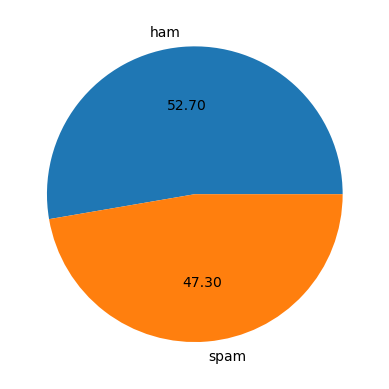

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [15]:
import nltk

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df['n_characters'] = df['text'].apply(len)

In [18]:
df['n_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [19]:
df['n_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
df.sample(5)

,label,text,n_characters,n_words,n_sentences
85460,1,your credit score doesn't matter to us if you ...,528,96,1
166402,1,oem software for you escapenumber discount and...,964,107,1
118321,1,across sugar burst oh twenty one summary handw...,802,105,1
55450,1,opt in email special offer n bsp unsubscribe m...,3498,477,1
135605,1,dear alumni this leading healthcare consulting...,3209,440,1


In [21]:
# For ham emails
df[df['label'] == 0][['n_characters','n_words','n_sentences']].describe()

,n_characters,n_words,n_sentences
count,1.021590e+05,1.021590e+05,102159.000000
mean,2.170390e+03,3.368471e+02,3.762331
std,3.656280e+04,5.048361e+03,26.428441
min,1.000000e+00,1.000000e+00,1.000000
25%,4.170000e+02,6.500000e+01,1.000000
50%,9.500000e+02,1.500000e+02,1.000000
75%,1.969000e+03,3.130000e+02,1.000000
max,1.151031e+07,1.585483e+06,2827.000000


In [22]:
# For spam emails
df[df['label'] == 1][['n_characters','n_words','n_sentences']].describe()

,n_characters,n_words,n_sentences
count,91691.000000,91691.000000,91691.000000
mean,1470.113435,217.754534,3.610485
std,2546.481821,352.960112,18.607687
min,1.000000,1.000000,1.000000
25%,314.000000,49.000000,1.000000
50%,694.000000,109.000000,1.000000
75%,1633.000000,246.000000,1.000000
max,144087.000000,25444.000000,3093.000000


In [23]:
import seaborn as sns

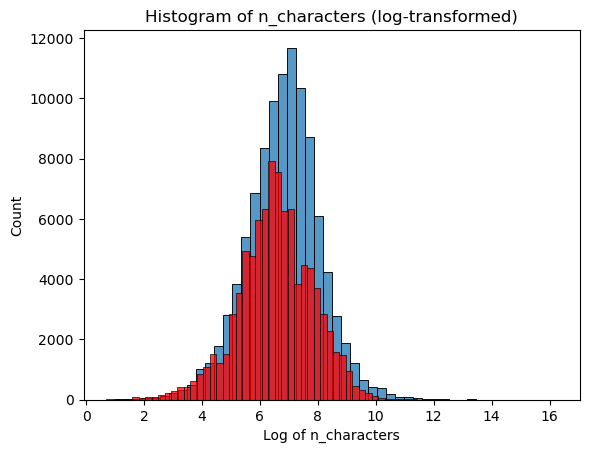

In [24]:
sns.histplot(np.log1p(df[df['label'] == 0]['n_characters']),bins=50)
sns.histplot(np.log1p(df[df['label'] == 1]['n_characters']),color='red',bins=50)
plt.xlabel('Log of n_characters')
plt.title('Histogram of n_characters (log-transformed)')
plt.show()

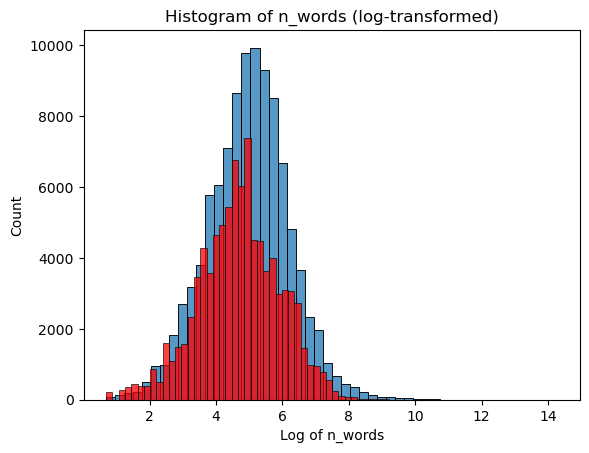

In [25]:
sns.histplot(np.log1p(df[df['label'] == 0]['n_words']),bins=50)
sns.histplot(np.log1p(df[df['label'] == 1]['n_words']),color='red',bins=50)
plt.xlabel('Log of n_words')
plt.title('Histogram of n_words (log-transformed)')
plt.show()

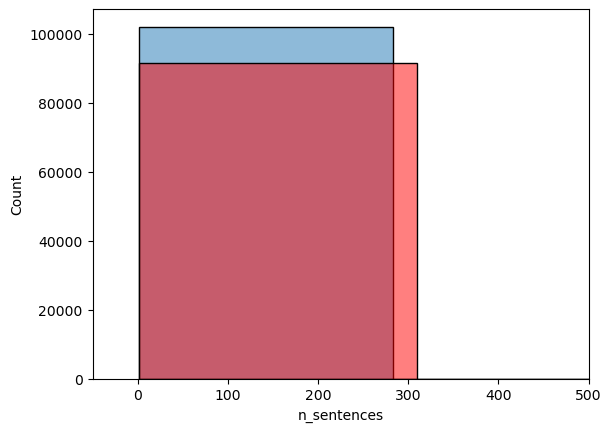

In [26]:
sns.histplot(df[df['label'] == 0]['n_sentences'],bins=10,alpha=0.5)
sns.histplot(df[df['label'] == 1]['n_sentences'],color='red',bins=10,alpha=0.5)
plt.xlim(-50,500)
plt.show()

C:\Users\manvi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


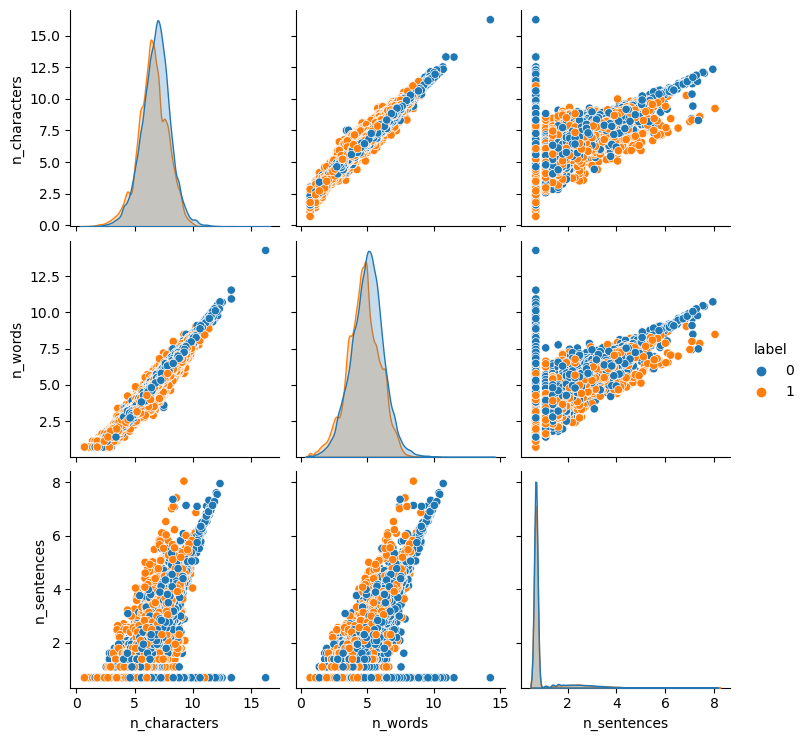

In [27]:
sns.pairplot(
    pd.DataFrame({
        'n_characters': np.log1p(df['n_characters']),
        'n_words': np.log1p(df['n_words']),
        'n_sentences': np.log1p(df['n_sentences']),
        'label': df['label']
    }),
    hue='label'
)
plt.show()

<Axes: >

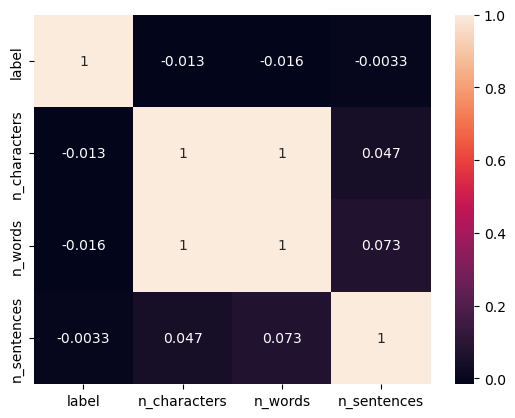

In [28]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## Data Preprocessing
1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and puctuation
5. Stemming

In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [33]:
def lower_case(text):
    return text.lower()

def tokenization(text):
    return nltk.word_tokenize(text)

def remove_special_characters(text):
    x = []
    for i in text:
        if i.isalnum():
            x.append(i)
    text = x[:]
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    x=[]
    for i in text:
        if i not in stop_words:
            x.append(i)
    text = x[:]
    return text

def punctuators(text):
    x=[]
    for i in text:
        if i not in string.punctuation:
            x.append(i)
    text = x[:]
    return text

def stemming(text):
    x = []
    for i in text:
        x.append(ps.stem(i))
    text = x[:]
    return " ".join(text)

In [34]:
def transform_text(text):
    text = lower_case(text)
    text = tokenization(text)
    text = remove_special_characters(text)
    text = remove_stopwords(text)
    text = punctuators(text)
    text = stemming(text)
    return text

In [35]:
!pip install swifter

In [36]:
import swifter

In [37]:
df['transformed_text1'] = df['text'].swifter.apply(transform_text)

Pandas Apply:   0%|          | 0/193850 [00:00<?, ?it/s]

In [38]:
df['transformed_text1'][1]

'got ice thought look az origin messag ice oper mailto iceoper intcx com sent friday octob escapenumb escapenumb escapenumb escapenumb pm subject escapelong amend particip agreement dear particip receiv email identifi compani user administr legal counsel signatori escapelong particip agreement serv notic intercontinent intent amend agreement effect decemb escapenumb escapenumb relev document attach includ contact inform question thank escapelong inc'

In [39]:
!pip install wordcloud

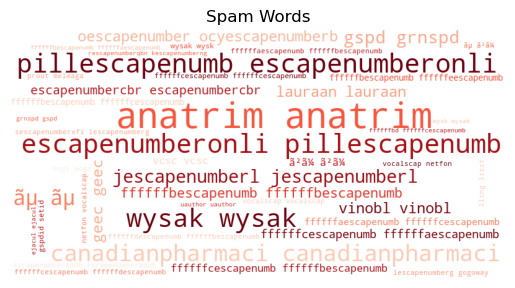

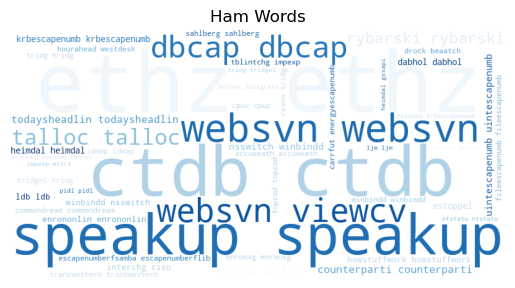

In [40]:
from wordcloud import WordCloud

# Get all words for spam and ham messages, combined into a single string each
spam_text = df[df['label'] == 1]['transformed_text1'].str.cat(sep=" ")
ham_text = df[df['label'] == 0]['transformed_text1'].str.cat(sep=" ")

# Find words that appear in both spam and ham messages (common words)
common_words = set(spam_text.split()) & set(ham_text.split())

# Remove common words to get only unique words for spam and ham
spam_unique_text = " ".join([word for word in spam_text.split() if word not in common_words])
ham_unique_text = " ".join([word for word in ham_text.split() if word not in common_words])

# Generate and display WordCloud for spam unique words, if there are any
if spam_unique_text:
    spam_unique_wc = WordCloud(width=800, height=400, 
                               background_color='white',
                               colormap='Reds', 
                               min_font_size=10).generate(spam_unique_text)
    plt.imshow(spam_unique_wc)
    plt.axis("off")
    plt.title("Spam Words")
    plt.show()

# Generate and display WordCloud for ham unique words, if there are any
if ham_unique_text:
    ham_unique_wc = WordCloud(width=800, height=400, 
                              background_color='white',
                              colormap='Blues', 
                              min_font_size=10).generate(ham_unique_text)
    plt.imshow(ham_unique_wc)
    plt.axis("off")
    plt.title("Ham Words")
    plt.show()


In [41]:
# Fetching top words of spam messages
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text1'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [42]:
spam_corpus

['viiiiiiagraaaa',
 'one',
 'want',
 'make',
 'scream',
 'prodigi',
 'scrawni',
 'crow',
 'defin',
 'upgrad',
 'spongi',
 'balboa',
 'dither',
 'moiseyev',
 'schumann',
 'varieg',
 'ponc',
 'berni',
 'cox',
 'angel',
 'impass',
 'circul',
 'impend',
 'miscellani',
 'chalkboard',
 'whizz',
 'pend',
 'armenian',
 'cutlet',
 'ware',
 'makeshift',
 'fletch',
 'dispel',
 'crest',
 'cadet',
 'dovetail',
 'rapproch',
 'gerri',
 'bayreuth',
 'selectman',
 'wilmington',
 'tuttl',
 'alchemi',
 'itt',
 'bullyboy',
 'caan',
 'yo',
 'ur',
 'wom',
 'ne',
 'ed',
 'escapenumb',
 'ch',
 'n',
 'b',
 'e',
 'th',
 'n',
 'f',
 'h',
 'er',
 'le',
 'arn',
 'h',
 'ow',
 'tu',
 'rn',
 'f',
 'ific',
 'ati',
 'on',
 'escapelong',
 'dy',
 'intern',
 'export',
 'ltd',
 'st',
 'regina',
 'escapenumb',
 'beliz',
 'citi',
 'beliz',
 'escapelong',
 'start',
 'increas',
 'odd',
 'success',
 'live',
 'sexual',
 'healthi',
 'easi',
 'impercept',
 'take',
 'take',
 'candi',
 'becom',
 'readi',
 '36',
 'hour',
 'love',
 'm

In [43]:
len(spam_corpus)

13519315

In [44]:
from collections import Counter
spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30))

In [45]:
spam_words

,0,1
0,escapenumb,1093881
1,escapelong,251329
2,cescapenumb,112736
3,bescapenumb,109852
4,com,100298
5,b,91577
6,http,87582
7,aescapenumb,79258
8,compani,60873
9,e,52023


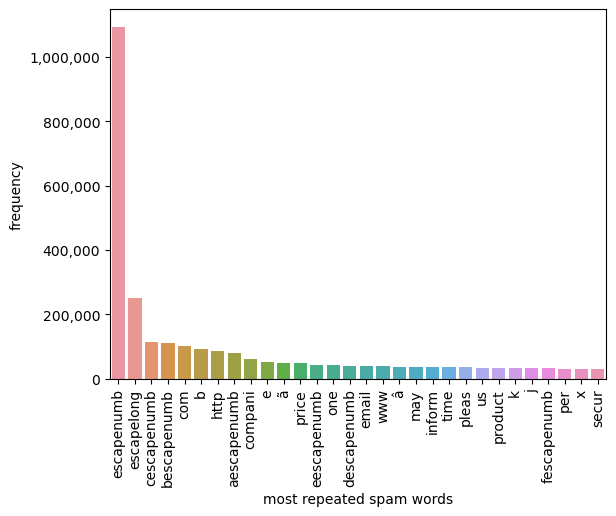

In [46]:
import matplotlib.ticker as mtick
sns.barplot(x=0,y=1,data=spam_words)
plt.xticks(rotation='vertical')
plt.xlabel('most repeated spam words')
plt.ylabel('frequency')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [47]:
# Fetching top words of ham messages
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text1'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [48]:
len(ham_corpus)

25142477

In [49]:
from collections import Counter
ham_words = pd.DataFrame(Counter(ham_corpus).most_common(30))

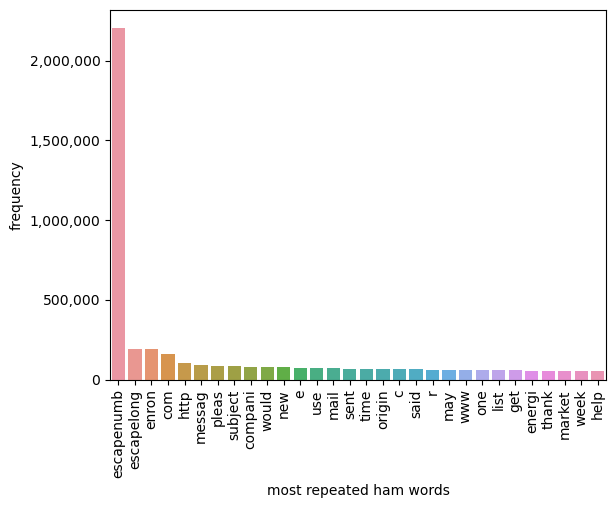

In [50]:
import matplotlib.ticker as mtick
sns.barplot(x=0,y=1,data=ham_words)
plt.xticks(rotation='vertical')
plt.xlabel('most repeated ham words')
plt.ylabel('frequency')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

## Model Building

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [136]:
x = tfidf.fit_transform(df['transformed_text1'])

In [137]:
x.shape

(193850, 357800)

In [138]:
y = df['label'].values

In [139]:
y.shape

(193850,)

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [142]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [143]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [144]:
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)

In [145]:
bnb.fit(x_train,y_train)
y_pred1 = bnb.predict(x_test)

In [146]:
from sklearn.metrics import accuracy_score,r2_score,precision_score

In [147]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.9674490585504256
0.982484076433121
0.8693323598015406


In [148]:
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(r2_score(y_test,y_pred1))

0.8870260510704153
0.8257290686735654
0.5464942440021772


In [152]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))